In [2]:
import pandas as pd
from pathlib import Path
from greensight.utils import DIR_ROOT
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy.signal import find_peaks
from datetime import datetime, date

ModuleNotFoundError: No module named 'scipy'

In [2]:
path_soil_carbon = DIR_ROOT / "share_point/data/JULES_outputs/Level_0_original_outputs/TW_UK_ERA5_BASE_V2_greenbelt16_ts_soil_carbon_interp_final__v1.xlsx"
path_veg_carbon = DIR_ROOT / "share_point/data/JULES_outputs/Level_0_original_outputs/TW_UK_ERA5_BASE_V2_greenbelt16_ts_vegetation_carbon_interp_final__v1.xlsx"
assert path_soil_carbon.is_file()
assert path_veg_carbon.is_file()

In [3]:
df_soil_raw = pd.read_excel(path_soil_carbon)
df_veg_raw = pd.read_excel(path_veg_carbon)

In [4]:
df_soil_raw.head(3)

,YrMthDay,year,mth_nr,,day_of_month,MthDay,Yr_mth_nr,Bath_and_Bristol_cs_gb_TW_UK_ERA5_BASE_V2,Birmingham_cs_gb_TW_UK_ERA5_BASE_V2,Blackpool_cs_gb_TW_UK_ERA5_BASE_V2,...,Cheltenham_and_Gloucester_cs_gb_TW_UK_ERA5_BASE_V2,Derby_and_Nottingham_cs_gb_TW_UK_ERA5_BASE_V2,London_cs_gb_TW_UK_ERA5_BASE_V2,Merseyside_and_Greater_Manchester_cs_gb_TW_UK_ERA5_BASE_V2,Oxford_cs_gb_TW_UK_ERA5_BASE_V2,South_West_Hampshire_cs_gb_TW_UK_ERA5_BASE_V2,South_and_West_Yorkshire_cs_gb_TW_UK_ERA5_BASE_V2,Stoke_on_Trent_cs_gb_TW_UK_ERA5_BASE_V2,Tyne_and_Wear_cs_gb_TW_UK_ERA5_BASE_V2,York_cs_gb_TW_UK_ERA5_BASE_V2
0,19700102,1970,1,Jan,2,102,1970_1,21.377278,18.247952,9.128355,...,17.566530,18.697467,21.809056,13.982956,22.056664,18.794014,17.213288,19.379328,17.951353,16.958119
1,19700103,1970,1,Jan,3,103,1970_1,21.376281,18.247033,9.127896,...,17.565801,18.696422,21.808157,13.982309,22.055550,18.793039,17.212433,19.378410,17.950424,16.957254
2,19700104,1970,1,Jan,4,104,1970_1,21.375373,18.246093,9.127416,...,17.565089,18.695352,21.807337,13.981649,22.054508,18.792190,17.211585,19.377469,17.949498,16.956414


In [5]:
df_veg_raw.head(3)

,YrMthDay,year,mth_nr,mth,day_of_month,MthDay,Yr_mth_nr,Bath_and_Bristol_cv_TW_UK_ERA5_BASE_V2,Birmingham_cv_TW_UK_ERA5_BASE_V2,Blackpool_cv_TW_UK_ERA5_BASE_V2,...,Cheltenham_and_Gloucester_cv_TW_UK_ERA5_BASE_V2,Derby_and_Nottingham_cv_TW_UK_ERA5_BASE_V2,London_cv_TW_UK_ERA5_BASE_V2,Merseyside_and_Greater_Manchester_cv_TW_UK_ERA5_BASE_V2,Oxford_cv_TW_UK_ERA5_BASE_V2,South_West_Hampshire_cv_TW_UK_ERA5_BASE_V2,South_and_West_Yorkshire_cv_TW_UK_ERA5_BASE_V2,Stoke_on_Trent_cv_TW_UK_ERA5_BASE_V2,Tyne_and_Wear_cv_TW_UK_ERA5_BASE_V2,York_cv_TW_UK_ERA5_BASE_V2
0,19700102,1970,1,Jan,2,102,1970_1,0.845986,0.835637,0.257019,...,0.489962,0.854591,1.257573,0.710441,0.634896,1.595895,0.839993,0.807666,1.061980,0.606093
1,19700103,1970,1,Jan,3,103,1970_1,0.845717,0.835365,0.256795,...,0.489701,0.854330,1.257306,0.710174,0.634613,1.595599,0.839716,0.807378,1.061695,0.605808
2,19700104,1970,1,Jan,4,104,1970_1,0.845482,0.835112,0.256592,...,0.489466,0.854088,1.257065,0.709926,0.634365,1.595356,0.839463,0.807107,1.061421,0.605549


In [8]:
def convert_df_dates(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df.columns = [c.replace(" ", "") for c in df.columns]
    df.insert(0, "date", df["YrMthDay"].apply(lambda x: datetime.strptime(str(x), "%Y%m%d").date()))
    df = df.set_index("date")
    try:
        return df.drop(columns=["YrMthDay", "year", "mth_nr", "", "day_of_month", "MthDay", "Yr_mth_nr"])
    except KeyError:
        return df.drop(columns=["YrMthDay", "year", "mth_nr", "mth", "day_of_month", "MthDay", "Yr_mth_nr"])
    

In [9]:
df_soil = convert_df_dates(df_soil_raw)
df_soil.head(3)

,Bath_and_Bristol_cs_gb_TW_UK_ERA5_BASE_V2,Birmingham_cs_gb_TW_UK_ERA5_BASE_V2,Blackpool_cs_gb_TW_UK_ERA5_BASE_V2,Burton_upon_Trent_and_Swadlincote_cs_gb_TW_UK_ERA5_BASE_V2,Cambridge_cs_gb_TW_UK_ERA5_BASE_V2,Carnforth_Lancaster_and_Morecambe_cs_gb_TW_UK_ERA5_BASE_V2,Cheltenham_and_Gloucester_cs_gb_TW_UK_ERA5_BASE_V2,Derby_and_Nottingham_cs_gb_TW_UK_ERA5_BASE_V2,London_cs_gb_TW_UK_ERA5_BASE_V2,Merseyside_and_Greater_Manchester_cs_gb_TW_UK_ERA5_BASE_V2,Oxford_cs_gb_TW_UK_ERA5_BASE_V2,South_West_Hampshire_cs_gb_TW_UK_ERA5_BASE_V2,South_and_West_Yorkshire_cs_gb_TW_UK_ERA5_BASE_V2,Stoke_on_Trent_cs_gb_TW_UK_ERA5_BASE_V2,Tyne_and_Wear_cs_gb_TW_UK_ERA5_BASE_V2,York_cs_gb_TW_UK_ERA5_BASE_V2
date,,,,,,,,,,,,,,,,
1970-01-02,21.377278,18.247952,9.128355,16.191114,17.290410,8.776074,17.566530,18.697467,21.809056,13.982956,22.056664,18.794014,17.213288,19.379328,17.951353,16.958119
1970-01-03,21.376281,18.247033,9.127896,16.190207,17.289599,8.775647,17.565801,18.696422,21.808157,13.982309,22.055550,18.793039,17.212433,19.378410,17.950424,16.957254
1970-01-04,21.375373,18.246093,9.127416,16.189249,17.288805,8.775220,17.565089,18.695352,21.807337,13.981649,22.054508,18.792190,17.211585,19.377469,17.949498,16.956414


In [10]:
df_veg = convert_df_dates(df_veg_raw)
df_veg.head(3)

,Bath_and_Bristol_cv_TW_UK_ERA5_BASE_V2,Birmingham_cv_TW_UK_ERA5_BASE_V2,Blackpool_cv_TW_UK_ERA5_BASE_V2,Burton_upon_Trent_and_Swadlincote_cv_TW_UK_ERA5_BASE_V2,Cambridge_cv_TW_UK_ERA5_BASE_V2,Carnforth_Lancaster_and_Morecambe_cv_TW_UK_ERA5_BASE_V2,Cheltenham_and_Gloucester_cv_TW_UK_ERA5_BASE_V2,Derby_and_Nottingham_cv_TW_UK_ERA5_BASE_V2,London_cv_TW_UK_ERA5_BASE_V2,Merseyside_and_Greater_Manchester_cv_TW_UK_ERA5_BASE_V2,Oxford_cv_TW_UK_ERA5_BASE_V2,South_West_Hampshire_cv_TW_UK_ERA5_BASE_V2,South_and_West_Yorkshire_cv_TW_UK_ERA5_BASE_V2,Stoke_on_Trent_cv_TW_UK_ERA5_BASE_V2,Tyne_and_Wear_cv_TW_UK_ERA5_BASE_V2,York_cv_TW_UK_ERA5_BASE_V2
date,,,,,,,,,,,,,,,,
1970-01-02,0.845986,0.835637,0.257019,0.752912,0.418538,0.416741,0.489962,0.854591,1.257573,0.710441,0.634896,1.595895,0.839993,0.807666,1.061980,0.606093
1970-01-03,0.845717,0.835365,0.256795,0.752675,0.418251,0.416546,0.489701,0.854330,1.257306,0.710174,0.634613,1.595599,0.839716,0.807378,1.061695,0.605808
1970-01-04,0.845482,0.835112,0.256592,0.752449,0.417988,0.416365,0.489466,0.854088,1.257065,0.709926,0.634365,1.595356,0.839463,0.807107,1.061421,0.605549


<Axes: xlabel='date', ylabel='Bath_and_Bristol_cv_TW_UK_ERA5_BASE_V2'>

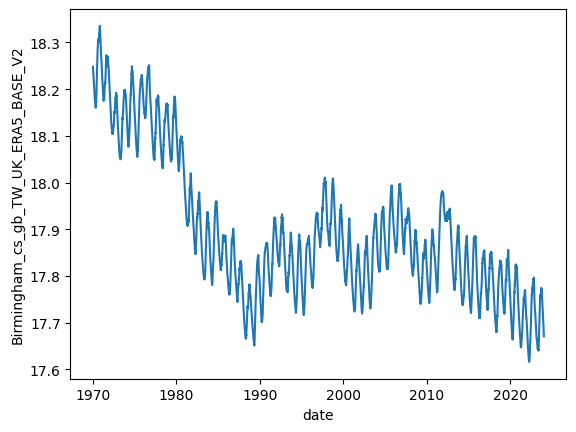

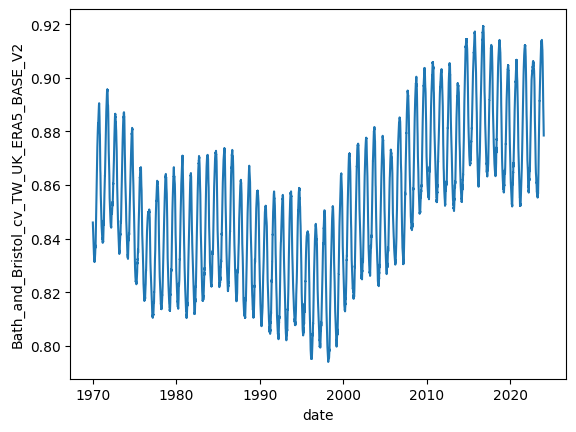

In [11]:
plt.figure()
sbn.lineplot(data=df_soil, x="date", y="Birmingham_cs_gb_TW_UK_ERA5_BASE_V2")
plt.figure()
sbn.lineplot(data=df_veg, x="date", y="Bath_and_Bristol_cv_TW_UK_ERA5_BASE_V2")

In [12]:

peak_inds = find_peaks(df_veg_raw["Bath_and_Bristol_cv_TW_UK_ERA5_BASE_V2"], distance=330)[0]
trough_inds = find_peaks(df_veg_raw["Bath_and_Bristol_cv_TW_UK_ERA5_BASE_V2"]*-1, distance=330)[0]

<Axes: xlabel='date', ylabel='Bath_and_Bristol_cv_TW_UK_ERA5_BASE_V2'>

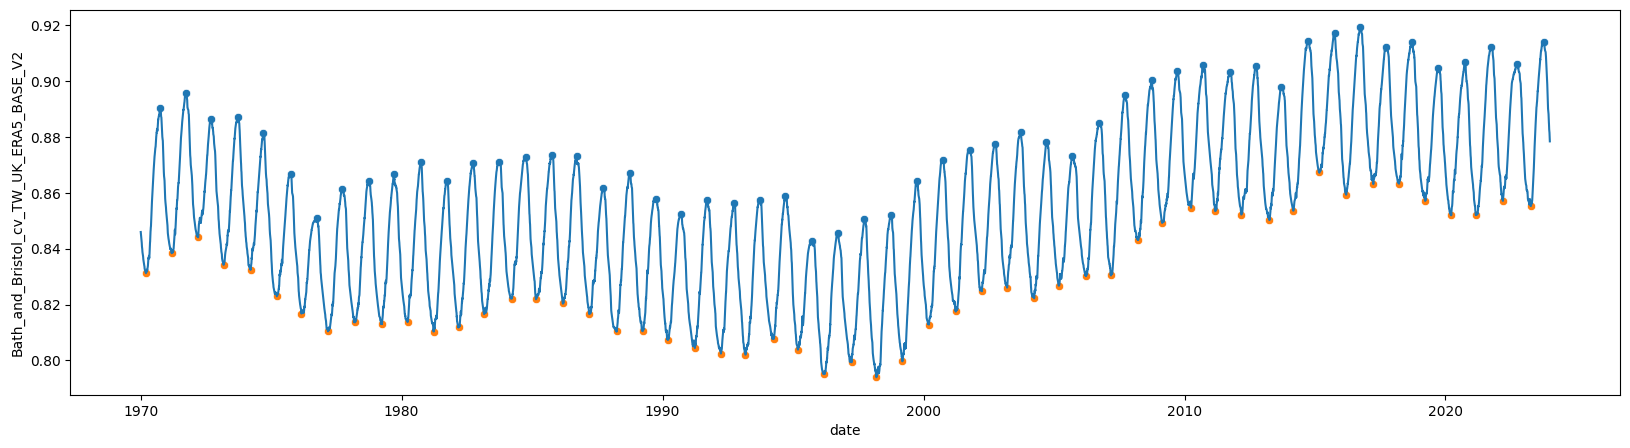

In [13]:
plt.figure(figsize=[20, 5])
sbn.lineplot(data=df_veg, x="date", y="Bath_and_Bristol_cv_TW_UK_ERA5_BASE_V2")
sbn.scatterplot(data=df_veg.iloc[peak_inds], x="date", y="Bath_and_Bristol_cv_TW_UK_ERA5_BASE_V2")
sbn.scatterplot(data=df_veg.iloc[trough_inds], x="date", y="Bath_and_Bristol_cv_TW_UK_ERA5_BASE_V2", c="C1")

In [69]:
from typing import Iterable, List, Tuple
import numpy.typing as npt
import numpy as np
from scipy.signal import resample
def extract_wavelengths(data: pd.DataFrame) -> Tuple[List[pd.DataFrame], npt.NDArray[np.float64]]:
    max_year = data.index.max().year
    min_year = data.index.min().year
    wavelengths = [group for _, group in data.groupby(data.index.map(lambda x: x.year))]
    return wavelengths
    

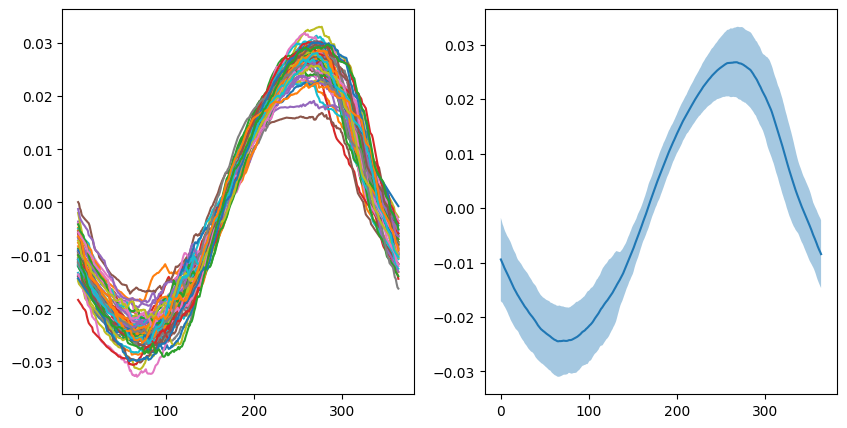

In [70]:
wavelengths = extract_wavelengths(df_veg["Bath_and_Bristol_cv_TW_UK_ERA5_BASE_V2"])
wavelengths = [wl.iloc[:365] for wl in wavelengths if wl.shape[0] >= 365] # whole years only
norm_wavelengths = [wl - wl.mean() for wl in wavelengths] # whole years only

fig, axs = plt.subplots(1, 2, figsize=[10, 5])
 
for wl in norm_wavelengths:
    axs[0].plot(np.arange(wl.shape[0]), wl)

axs[1].fill_between(np.arange(365),
                    np.mean(norm_wavelengths, axis=0)-2*np.std(norm_wavelengths, axis=0),
                    np.mean(norm_wavelengths, axis=0)+2*np.std(norm_wavelengths, axis=0),
                    alpha=0.4)
axs[1].plot(np.arange(365),
            np.mean(norm_wavelengths, axis=0))


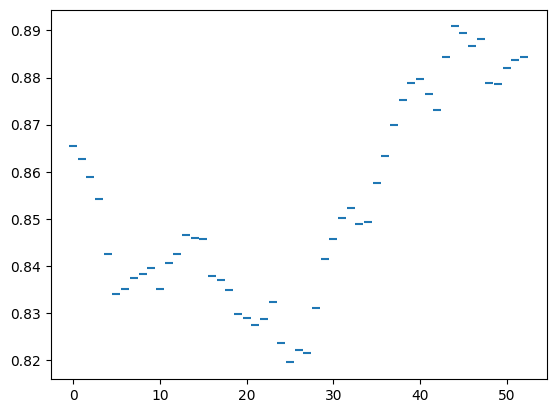

In [71]:
mus = np.array([wl.mean() for wl in wavelengths])
plt.scatter(np.arange(mus.shape[0]), mus, marker="_")

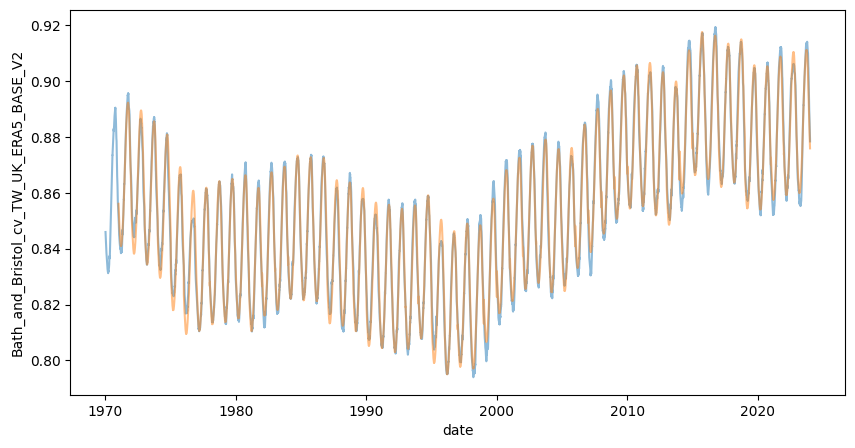

In [72]:
# reconstruct 
reconstruction = [pd.DataFrame(np.mean(norm_wavelengths, axis=0)+wl.mean(), index=wl.index) for wl in wavelengths]
reconstruction = pd.concat(reconstruction)
plt.figure(figsize=[10, 5])
sbn.lineplot(data=df_veg, x="date", y="Bath_and_Bristol_cv_TW_UK_ERA5_BASE_V2", c="C0", alpha=0.5)
plt.plot(reconstruction, c="C1", alpha=0.5)

In [79]:
wavelengths_ = extract_wavelengths(df_veg["Blackpool_cv_TW_UK_ERA5_BASE_V2"])
wavelengths_ = [wl.iloc[:365] for wl in wavelengths_ if wl.shape[0] >= 365] # whole years only
norm_wavelengths_ = [wl - wl.mean() for wl in wavelengths_] # whole years only


In [98]:
reconstruction_ = [pd.DataFrame(np.mean(norm_wavelengths_, axis=0)*1.7+wl.mean()+0.005, index=wl.index) for wl in wavelengths]
reconstruction_ = pd.concat(reconstruction_)


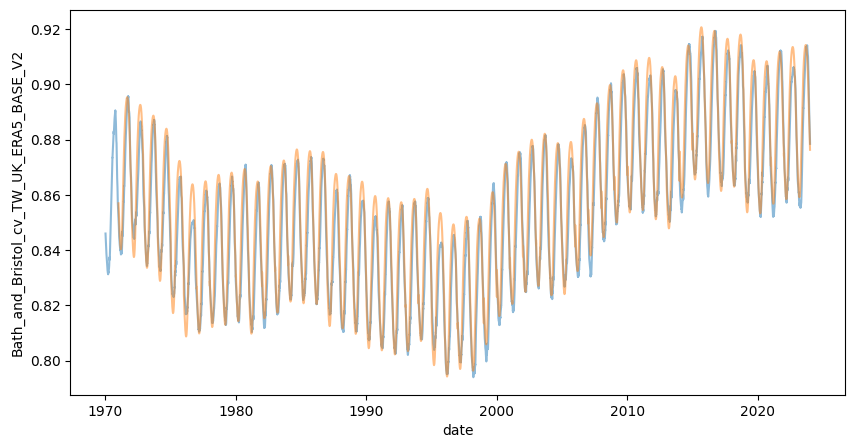

In [99]:
plt.figure(figsize=[10, 5])
sbn.lineplot(data=df_veg, x="date", y="Bath_and_Bristol_cv_TW_UK_ERA5_BASE_V2", c="C0", alpha=0.5)
plt.plot(reconstruction_, c="C1", alpha=0.5)